In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
dfs = []

# Componentes de la url
url_base = "https://www.irb-cisr.gc.ca/en/statistics/protection/Pages/RPDStat"
url_end = ".aspx"


for year in range(2016, 2024):
    #Url de cada año
    url = f"{url_base}{year}{url_end}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Obtener contenido de tabla
    table = soup.find('table')
    
    if table:
        # Tbody
        tbody = table.find('tbody')
        #Filas
        rows = tbody.find_all('tr')
        
        
        countries = []
        applications = []
        
        
        for row in rows:
            # Extraer países
            countries.append(row.find_all('td')[0].text.strip())
            # Limpiar aplicaciones
            applications.append(row.find_all('td')[1].text.strip().replace(',', '').replace('\n', '').replace('--', '0'))
        
        # Dataframe
        df_year = pd.DataFrame({'pais': countries, 'aplicaciones': applications, 'año': year})
        # Aplicaciones a numérico
        df_year['aplicaciones'] = pd.to_numeric(df_year['aplicaciones'], errors='coerce').fillna(0).astype(int)
        
        
        dfs.append(df_year)



In [3]:
df_final = pd.concat(dfs, ignore_index=True)
#Filtrar Mexico
df_final=df_final[df_final['pais']=='Mexico']
df_final

,pais,aplicaciones,año
98,Mexico,250,2016
267,Mexico,1459,2017
442,Mexico,3157,2018
619,Mexico,5634,2019
799,Mexico,2088,2020
978,Mexico,3321,2021
1159,Mexico,7483,2022
1338,Mexico,25236,2023


Text(0.95, 0.01, 'Fuente: Elaborado por el Maestro Karin con información del Immigration and Refugee Board of Canada')

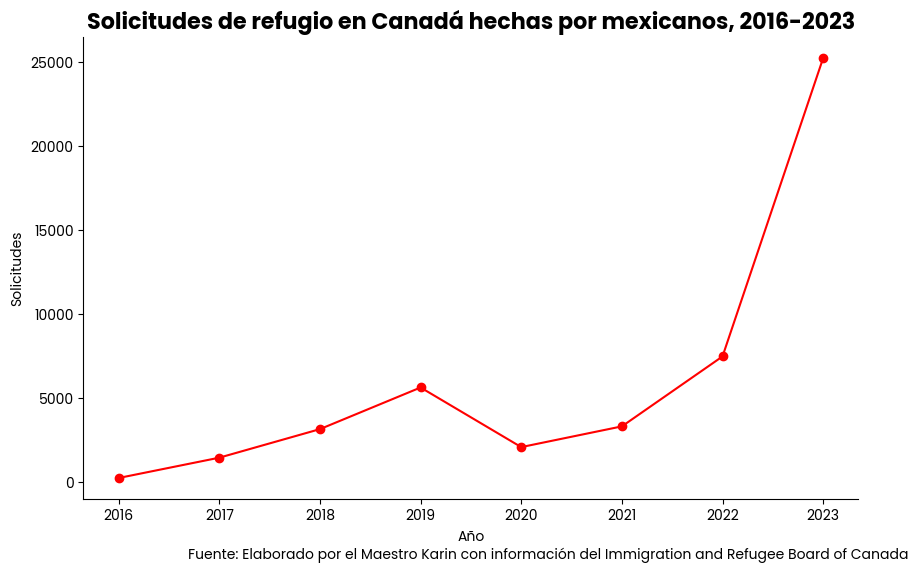

In [5]:
#Gráfica de solicitudes
#Poppins
plt.rcParams['font.family'] = 'Poppins'
plt.figure(figsize=(10, 6))
plt.plot(df_final['año'], df_final['aplicaciones'], marker='o', linestyle='-', color='red')
plt.title('Solicitudes de refugio en Canadá hechas por mexicanos, 2016-2023', fontsize=16, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Solicitudes')
#Eliminar borde izquierdo y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#Fuente del gráfico
plt.figtext(0.95, 0.01, 'Fuente: Elaborado por el Maestro Karin con información del Immigration and Refugee Board of Canada', horizontalalignment='right')
